# Comparing Australian and Turkish Prices #

In [32]:
#%pip install numpy matplotlib
#%pip install pandas

In [33]:
from IPython.display import display, Markdown
def md(s):
    display(Markdown(s))

import numpy as np

# Price comparison between Australia and Turkey #

In [34]:
AUnames=["Banana", "Onion", "Beef Mince", "Milk", "Egg",      "Rice", "Petrol"]
TRnames=["Muz",    "Sogan", "Kiyma",        "Sut", "Yumurta", "Pirinc", "Benzin"]
Units=["kg",          "kg",   "kg",         "lt", "ea",           "kg", "lt"]

Descriptions:
* Ithal muz
* Regular beef mince
* Baldo pirinc
* Pinar sut
* Yumurta 15lik paket
* Norco full cream milk 2L
* Coles free range eggs 12-pack
* Coles long grain rice

In [35]:
import pandas as pd

df = pd.read_csv('data/prices.csv')
# Copy the first row into a string array "Names"
Names = df.columns.values
AUnames = Names[2:9]
TRnames = Names[9:16]
# Starting from row #3, copy the first column into a string array "Dates"
Dates = df['Date'].values[1:]
# Read the columns 2 to 8 into a numpy array "AUs"
AUs = df[AUnames].values[1:]
# Read the columns 9 to 15 into a numpy array "TRs"
TRs = df[TRnames].values[1:]
# Read the valus 2 to 8 in Row #2 into a numpy array "AU_Multipliers"
AU_Multipliers = df[AUnames].values[0]
# Read the values 9 to 15 in Row #2 into a numpy array "TR_Multipliers"
TR_Multipliers = df[TRnames].values[0]
# Starting from Row #2, read the second column into a numpy array "Xrate"
Xrate = df['Exchange Rate'].values[1:]

In [36]:
import datetime
ndate=len(Dates)-1
# date_str = Dates[ndate]
# date_obj = datetime.datetime.strptime(date_str, "%d/%m/%Y")
# formatted_date = date_obj.strftime("%d-%m-%y")


def showprices(Language, n, tabulate=False):
    date_str=Dates[n]
    date_obj = datetime.datetime.strptime(date_str, "%d/%m/%Y")
    formatted_date = date_obj.strftime("%d-%m-%y")
    if Language=="English":
        names=AUnames
    else:
        names=TRnames

    Names="|"+formatted_date+"|"
    Bars="|---|"
    for i in range(len(names)):
        Names+=names[i]+"|"
        Bars+="---|"
    s=Names+"AT Index|\n"+Bars+"---|"
        
 
    s+="\n|AU"
    for i in range(len(AUnames)):
        s+="|"+"{:.2f}".format(AUs[n][i]*Xrate[n]/AU_Multipliers[i])
    # s+="|\n"
    s+="|.|\n|TR"
    for i in range(len(TRnames)):
        s+="|"+"{:.2f}".format(TRs[n][i]/TR_Multipliers[i])
    s+="|.|\n"
    s+="|%.2f"%Xrate[n]
    divided_list = (AUs[n]*Xrate[n]/AU_Multipliers)/ (TRs[n]/TR_Multipliers)
    HGindex=sum(divided_list)/len(divided_list)
    for i in range(len(AUnames)):
        s+="|"+"{:.2f}".format(divided_list[i])
    s+="|"+"{:.2f}".format(HGindex)
    if tabulate:
        md(s)
    return HGindex


In [37]:
nrow=len(Dates)-1

In [38]:
showprices("English",nrow, tabulate=True)


|04-08-24|Banana|Onion|Beef Mince|Milk|Egg|Rice|Petrol|AT Index|
|---|---|---|---|---|---|---|---|---|
|AU|92.62|77.54|236.94|45.23|9.33|38.77|42.22|.|
|TR|69.95|9.75|399.95|45.00|3.50|64.95|45.20|.|
|21.54|1.32|7.95|0.59|1.01|2.67|0.60|0.93|2.15

np.float64(2.153259441581398)

In [39]:
showprices("Turkish",nrow, tabulate=True)

|04-08-24|Muz|Sogan|Kiyma|Sut|Yumurta|Pirinc|Benzin|AT Index|
|---|---|---|---|---|---|---|---|---|
|AU|92.62|77.54|236.94|45.23|9.33|38.77|42.22|.|
|TR|69.95|9.75|399.95|45.00|3.50|64.95|45.20|.|
|21.54|1.32|7.95|0.59|1.01|2.67|0.60|0.93|2.15

np.float64(2.153259441581398)

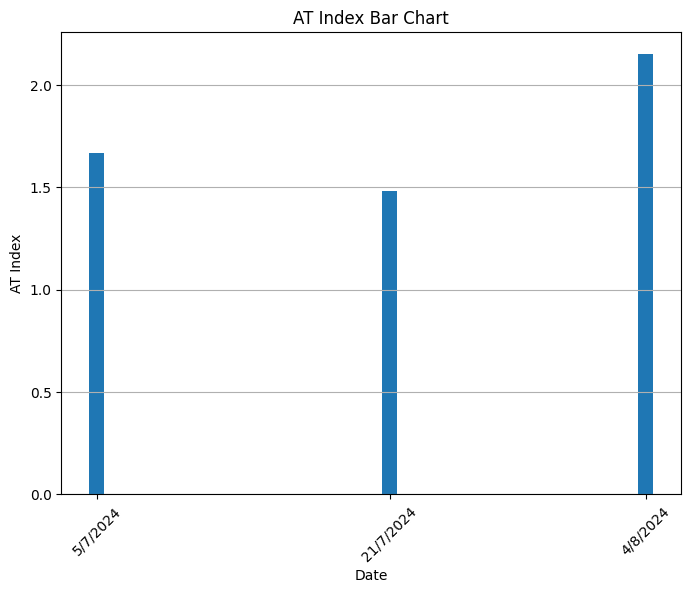

In [40]:
ATindex=np.zeros(len(Dates))
for n in range(len(Dates)):
    ATindex[n]=showprices("English",n, tabulate=False)
#
import matplotlib.pyplot as plt
import pandas as pd

# Convert dates to pandas DatetimeIndex
dates = pd.to_datetime(Dates, dayfirst=True)

# Plotting
plt.figure(figsize=(8, 6))
plt.bar(dates, ATindex, width=0.8)  # Use plt.bar for bar plot
plt.xticks(dates, labels=Dates, rotation=45)
plt.xlabel('Date')
plt.ylabel('AT Index')
plt.title('AT Index Bar Chart')
plt.grid(axis='y')
plt.show()

In [41]:
print(ATindex)

[1.66787261 1.48224665 2.15325944]


In [42]:
print(Names)
print(AUnames)
print(TRnames)
print(Dates)
print(AUs)
print(TRs)
print(AU_Multipliers)
print(TR_Multipliers)
print(Xrate)

['Date' 'Exchange Rate' 'Banana' 'Onion' 'Beef Mince' 'Milk' 'Egg' 'Rice'
 'Petrol' 'Muz' 'Sogan' 'Kiyma' 'Sut' 'Yumurta' 'Pirinc' 'Benzin']
['Banana' 'Onion' 'Beef Mince' 'Milk' 'Egg' 'Rice' 'Petrol']
['Muz' 'Sogan' 'Kiyma' 'Sut' 'Yumurta' 'Pirinc' 'Benzin']
['5/7/2024' '21/7/2024' '4/8/2024']
[[ 4.    2.   11.    4.2   5.6   1.8   1.78]
 [ 4.    2.5  11.    4.2   5.2   1.8   1.73]
 [ 4.3   3.6  11.    4.2   5.2   1.8   1.96]]
[[ 45.    18.   420.    45.    37.5   62.5   43.5 ]
 [ 70.    17.   378.    45.    52.5   65.    45.  ]
 [ 69.95   9.75 399.95  45.    52.5   64.95  45.2 ]]
[ 1.  1.  1.  2. 12.  1.  1.]
[ 1.  1.  1.  1. 15.  1.  1.]
[22.06 22.08 21.54]
